# Mohammad Ansari

# THE SPARKS FOUNDATION

# DATASCIENCE AND BUSINESS ANALYTICS

Task 3: Exploratory Data Analysis of Retail on SampleSuperstore dataset 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head() # See the first 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [7]:
df.sum()

Ship Mode       Second ClassSecond ClassSecond ClassStandard C...
Segment         ConsumerConsumerCorporateConsumerConsumerConsu...
Country         United StatesUnited StatesUnited StatesUnited ...
City            HendersonHendersonLos AngelesFort LauderdaleFo...
State           KentuckyKentuckyCaliforniaFloridaFloridaCalifo...
Postal Code                                             551572652
Region          SouthSouthWestSouthSouthWestWestWestWestWestWe...
Category        FurnitureFurnitureOffice SuppliesFurnitureOffi...
Sub-Category    BookcasesChairsLabelsTablesStorageFurnishingsA...
Sales                                                  2.2972e+06
Quantity                                                    37873
Discount                                                  1561.09
Profit                                                     286397
dtype: object

In [10]:
#calculating the count of column: segment
seg=df.Segment.value_counts().reset_index()
seg.columns=("Segment","counts")
seg

,Segment,counts
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


([<matplotlib.patches.Wedge at 0xd5dd610>,
 [Text(-0.13408036713364035, 2.1959103932422446, 'Consumer'),
  Text(-1.0537686579632295, -1.9312098838537397, 'Corporate'),
  Text(1.8633972391176687, -1.1695087555245793, 'Home Office')],
 [Text(-0.07313474570925836, 1.1977693054048604, '51.94'),
  Text(-0.5747829043435797, -1.053387209374767, '30.22'),
  Text(1.0163984940641828, -0.6379138666497705, '17.84')])

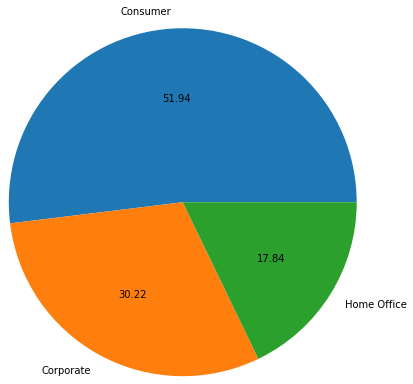

In [11]:
#Pie Chart 
plt.pie(x="counts",labels="Segment",data=seg,radius=2, autopct="%.2f",pctdistance=0.6)

In [9]:
#To find out the respective columns related to high sales
sale_high=df[df["Sales"]>3000]
sale_high.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
165,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Technology,Machines,8159.952,8,0.4,-1359.9920
251,Standard Class,Consumer,United States,San Diego,California,92037,West,Technology,Accessories,3347.370,13,0.0,636.0003
262,Second Class,Corporate,United States,Houston,Texas,77036,Central,Technology,Machines,3059.982,3,0.4,-509.9970
318,Standard Class,Home Office,United States,New York City,New York,10024,East,Technology,Machines,3991.980,2,0.0,1995.9900


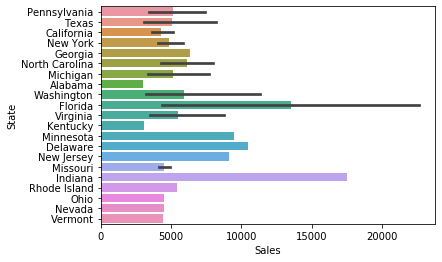

In [18]:
#visualising data with the help of a bar plot to find the states with high sales
sns.barplot(y=sale_high["State"],x=sale_high["Sales"],data=df)

In [19]:
#Highest value of sales
df.Sales.max()

22638.48

In [21]:
#Displaying the lowest sales data
sale_lowest=df[df["Sales"]<1]
sale_lowest.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2106,Same Day,Corporate,United States,Mesquite,Texas,75150,Central,Office Supplies,Binders,0.876,1,0.8,-1.4016
2761,First Class,Home Office,United States,San Francisco,California,94110,West,Technology,Accessories,0.990,1,0.0,0.4356
4101,Standard Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100
4711,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Binders,0.852,1,0.7,-0.5964
7548,Standard Class,Corporate,United States,Huntsville,Texas,77340,Central,Office Supplies,Binders,0.898,1,0.8,-1.5715


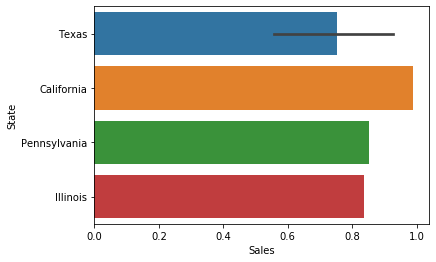

In [22]:
#Barplot to display the states with lowest sales data
sns.barplot(y=sale_lowest["State"],x=sale_lowest["Sales"],data=sale_lowest)

In [26]:
#Displaying the data for Low Profit
low_profit=df[df["Profit"]<1]
low_profit.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


this is how the areas having lower profit can be found out

Conclusion: The above evaluation of data clearly give an idea of weak points which needs improvement.It is easier to find weak and strong points by visualizing the data using charts and plots.Here values less than 1 is termed as a loss, and those with low profit has been found which will be helpful for business analysis.